In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import missingno as mno  
from datetime import timedelta, date

In [9]:
gold_data = pd.read_csv('../data/LBMA-GOLD.csv')
bitCoin_data = pd.read_csv('../data/BCHAIN-MKPRU.csv')

##  功能函数

In [10]:
# 日期转换函数
def str2date(x):
    tmp_time = x.split('/')
    return datetime.datetime(2000+int(tmp_time[2]), int(tmp_time[0]), int(tmp_time[1]))

# 比特币数据处理

In [11]:
print('比特币数据长度 : ',len(bitCoin_data))
# 比特币不含空缺值
bitCoin_data.isna().sum()

比特币数据长度 :  1826


Date     0
Value    0
dtype: int64

<AxesSubplot:xlabel='Date'>

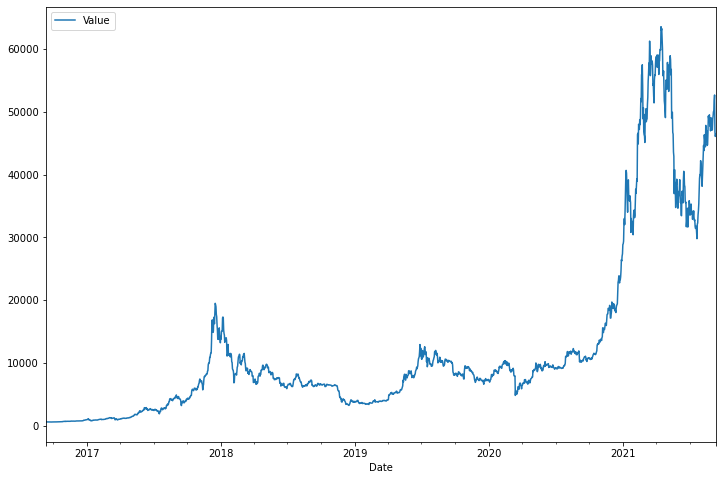

In [12]:
# 比特币日期转换
bitCoin_data['Date'] = bitCoin_data['Date'].apply(str2date)
bitCoin_data.plot('Date', 'Value', figsize=(12,8))

# 黄金数据处理

In [13]:
gold_data.describe()

,USD (PM)
count,1255.000000
mean,1464.549402
std,249.291812
min,1125.700000
25%,1266.175000
50%,1329.050000
75%,1723.750000
max,2067.150000


In [14]:
print('黄金数据长度 : ',len(gold_data))

黄金数据长度 :  1265


黄金数据缺失值分析

<AxesSubplot:>

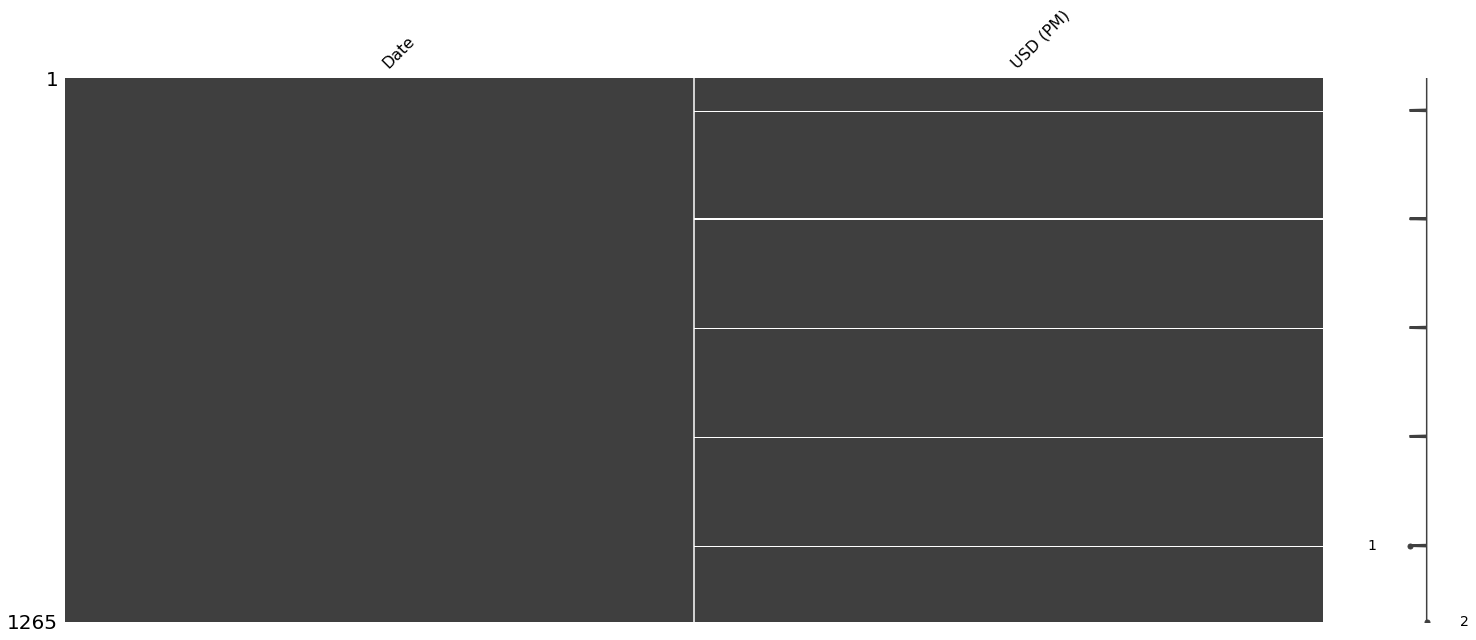

In [15]:
mno.matrix(gold_data)  

In [16]:
# 黄金有10条数据是空的
gold_data.isna().sum()

Date         0
USD (PM)    10
dtype: int64

In [17]:
# 黄金缺失的日期------（日历效应）
gold_data[gold_data['USD (PM)'].isna()]

,Date,USD (PM)
74,12/23/16,NaN
77,12/30/16,NaN
326,12/22/17,NaN
329,12/29/17,NaN
579,12/24/18,NaN
582,12/31/18,NaN
832,12/24/19,NaN
835,12/31/19,NaN
1086,12/24/20,NaN
1089,12/31/20,NaN


In [18]:
gold_data['USD (PM)'].interpolate(method='nearest', inplace=True)

In [19]:
# 填充成功
gold_data.isna().sum()

Date        0
USD (PM)    0
dtype: int64

<AxesSubplot:>

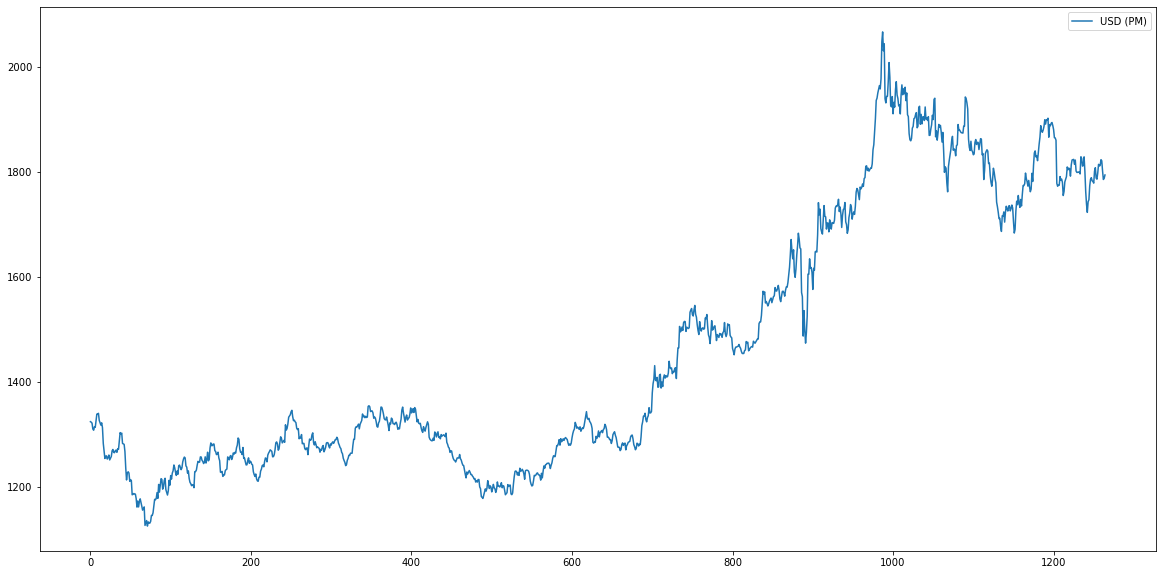

In [20]:
gold_data.plot(figsize=(20,10))

黄金的日期转换

<AxesSubplot:xlabel='Date'>

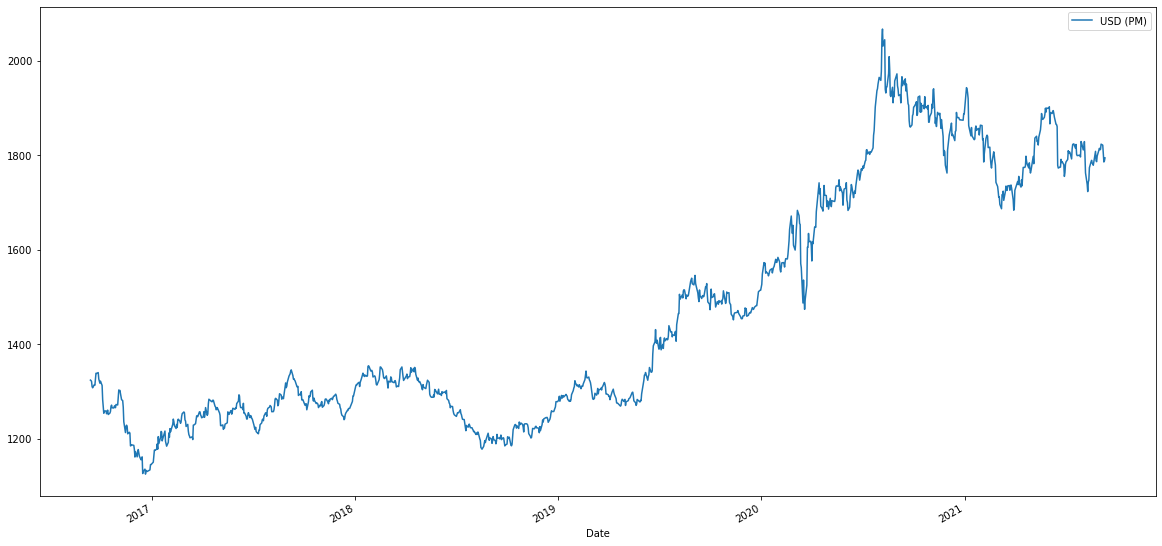

In [21]:
# def str2date(x):
#     tmp_time = x.split('/')
#     return datetime.datetime(2000+int(tmp_time[2]), int(tmp_time[0]), int(tmp_time[1]))
# 日期转换
gold_data['Date'] = gold_data['Date'].apply(str2date)
gold_data.plot('Date', 'USD (PM)', figsize=(20,10))

黄金日历效应： 周末填补neighbor的值

In [28]:
print('gold data : ', gold_data.shape)
print('bitCoin : ', bitCoin_data.shape)
gold_complete = pd.DataFrame(bitCoin_data['Date'])
gold_complete = gold_complete.merge(gold_data,how='left')
gold_complete['USD (PM)'].interpolate(method='nearest', inplace=True)
gold_complete.fillna(method='bfill', inplace=True)

gold data :  (1265, 2)
bitCoin :  (1826, 2)


In [32]:
# 出现0表示我们的填补是成功的
gold_complete.isna().sum()

Date        0
USD (PM)    0
dtype: int64

<AxesSubplot:xlabel='Date'>

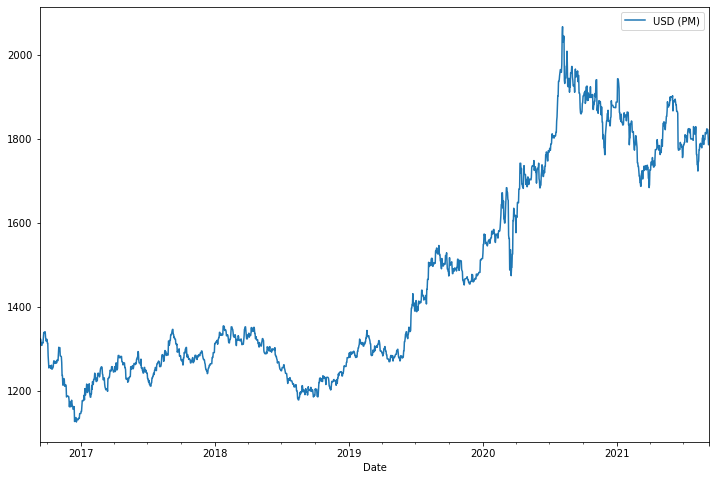

In [29]:
# 填补日历效应成功
gold_complete.plot('Date', 'USD (PM)', figsize=[12, 8])

In [31]:
# 数据保存
bitCoin_data.to_csv('../data/bitCoin.csv')
gold_data.to_csv('../data/gold.csv')
gold_complete.to_csv('../data/gold_complete.csv')

In [3]:
import pandas as pd
pd.read_csv('../data/bitCoin.csv')

,Unnamed: 0,Date,Value
0,0,2016-09-11,621.65
1,1,2016-09-12,609.67
2,2,2016-09-13,610.92
3,3,2016-09-14,608.82
4,4,2016-09-15,610.38
...,...,...,...
1821,1821,2021-09-06,51769.06
1822,1822,2021-09-07,52677.40
1823,1823,2021-09-08,46809.17
1824,1824,2021-09-09,46078.38
